In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import sympy # equation solver
from scipy import stats # for 2d-histograms
from scipy.interpolate import LinearNDInterpolator
# import h5py # lese matlab data
import pandas as pd


file_path = r"C:\Users\hattermann\Norsk Polarinstitutt\TONe - TONe budsjett og prosjektorganisering - TONe budsjett og prosjektorganisering\Arbeidspakker\FIO\data\mooring_data\M3_2025\250222_m3upper_1440_dsu15973_clean.Asc"
dfu = pd.read_csv(file_path, delim_whitespace=True, header=None)

file_pathl = r"C:\Users\hattermann\Norsk Polarinstitutt\TONe - TONe budsjett og prosjektorganisering - TONe budsjett og prosjektorganisering\Arbeidspakker\FIO\data\mooring_data\M3_2025\250222_m3lower_1439_dsu15971_clean.Asc"
dfl = pd.read_csv(file_pathl, delim_whitespace=True, header=None)


C:\Users\hattermann\AppData\Local\Temp\ipykernel_29540\2263409108.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfu = pd.read_csv(file_path, delim_whitespace=True, header=None)
C:\Users\hattermann\AppData\Local\Temp\ipykernel_29540\2263409108.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfl = pd.read_csv(file_pathl, delim_whitespace=True, header=None)


C:\Users\hattermann\AppData\Local\Temp\ipykernel_29540\1946109086.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dfu.time = pd.date_range(start=start_date, periods=num_hours, freq="H")


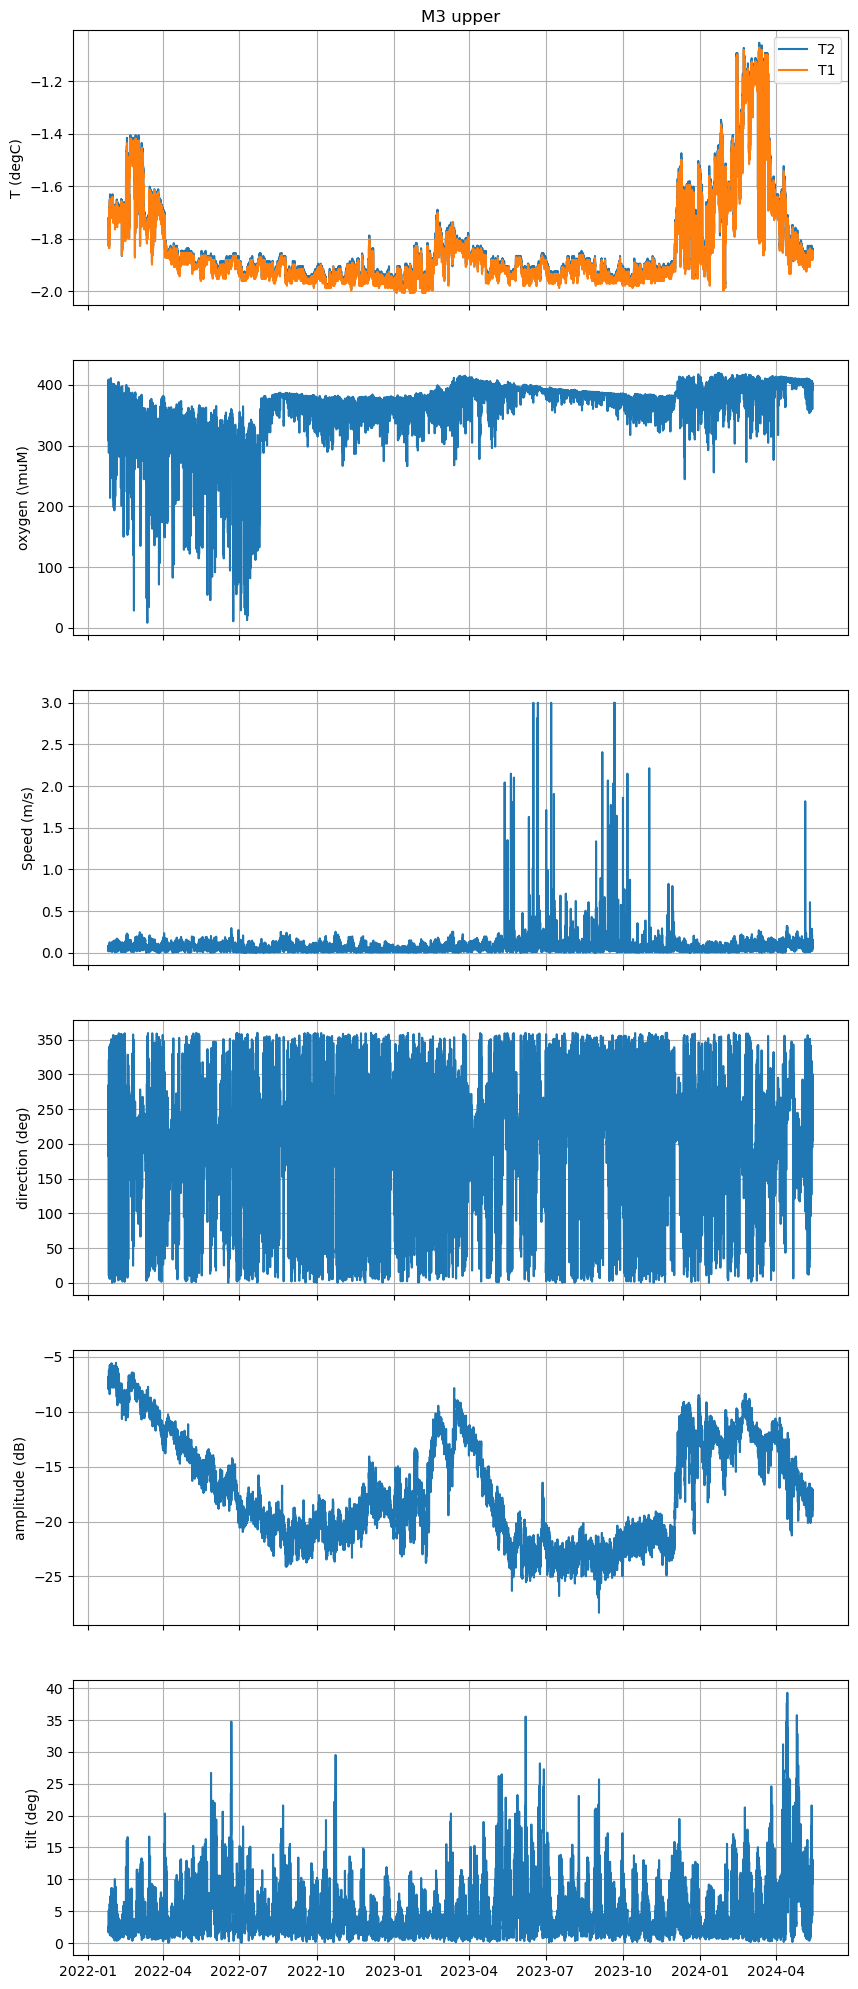

In [4]:
# Define start date
start_date = "2022-01-25 15:00"  # M3 upper date accoring to logsheet

# convert M3 upper

# Define the number of hours in your time series
num_hours = len(dfu.index)  # Example length of time series

# Create datetime vector
dfu.time = pd.date_range(start=start_date, periods=num_hours, freq="H")

dfu.spd = 0.01*2.933E-01*dfu[1]
#spd[spd > 0.3] = np.nan

dfu.dir = 3.516E-01*dfu[2]
dfu.c = 7.324E-02*dfu[4]
dfu.p = 9.766E+00*dfu[5]
dfu.o2 = 4.883E-01*dfu[7]
dfu.amp = -3.9100E-02*dfu[8]
dfu.tlt = 4.3988E-02*dfu[9]

d = dfu[3]
dfu.t1 = -3.179E+00 + 9.006E-03*d + -3.476E-07*d**2 + 1.134E-10 # Arctic
d = dfu[6]
dfu.t2 = -5.000E+00 + 9.76563E-03*d

# plot M3 upper

fig,ax=plt.subplots(6,1, sharex =True, figsize=np.array([10, 25]))
ax[0].plot(dfu.time, dfu.t2, label="T2")
ax[0].plot(dfu.time, dfu.t1, label="T1")
ax[0].set_ylabel("T (degC)")
ax[0].set_title("M3 upper")
ax[0].legend()
ax[0].grid()

ax[1].plot(dfu.time, dfu.o2)
ax[1].set_ylabel("oxygen (\muM)")
ax[1].grid()

ax[2].plot(dfu.time, dfu.spd)
ax[2].set_ylabel("Speed (m/s)")
ax[2].grid()

ax[3].plot(dfu.time, dfu.dir)
ax[3].set_ylabel("direction (deg)")
ax[3].grid()

ax[4].plot(dfu.time, dfu.amp)
ax[4].set_ylabel("amplitude (dB)")
ax[4].grid()

ax[5].plot(dfu.time, dfu.tlt)
ax[5].set_ylabel("tilt (deg)")
ax[5].grid()

#plt.show()


plt.savefig("../plot/M3_upper2.png",bbox_inches='tight')



C:\Users\hattermann\AppData\Local\Temp\ipykernel_29540\1294015834.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dfl.time = pd.date_range(start=start_date, periods=num_hours, freq="H")


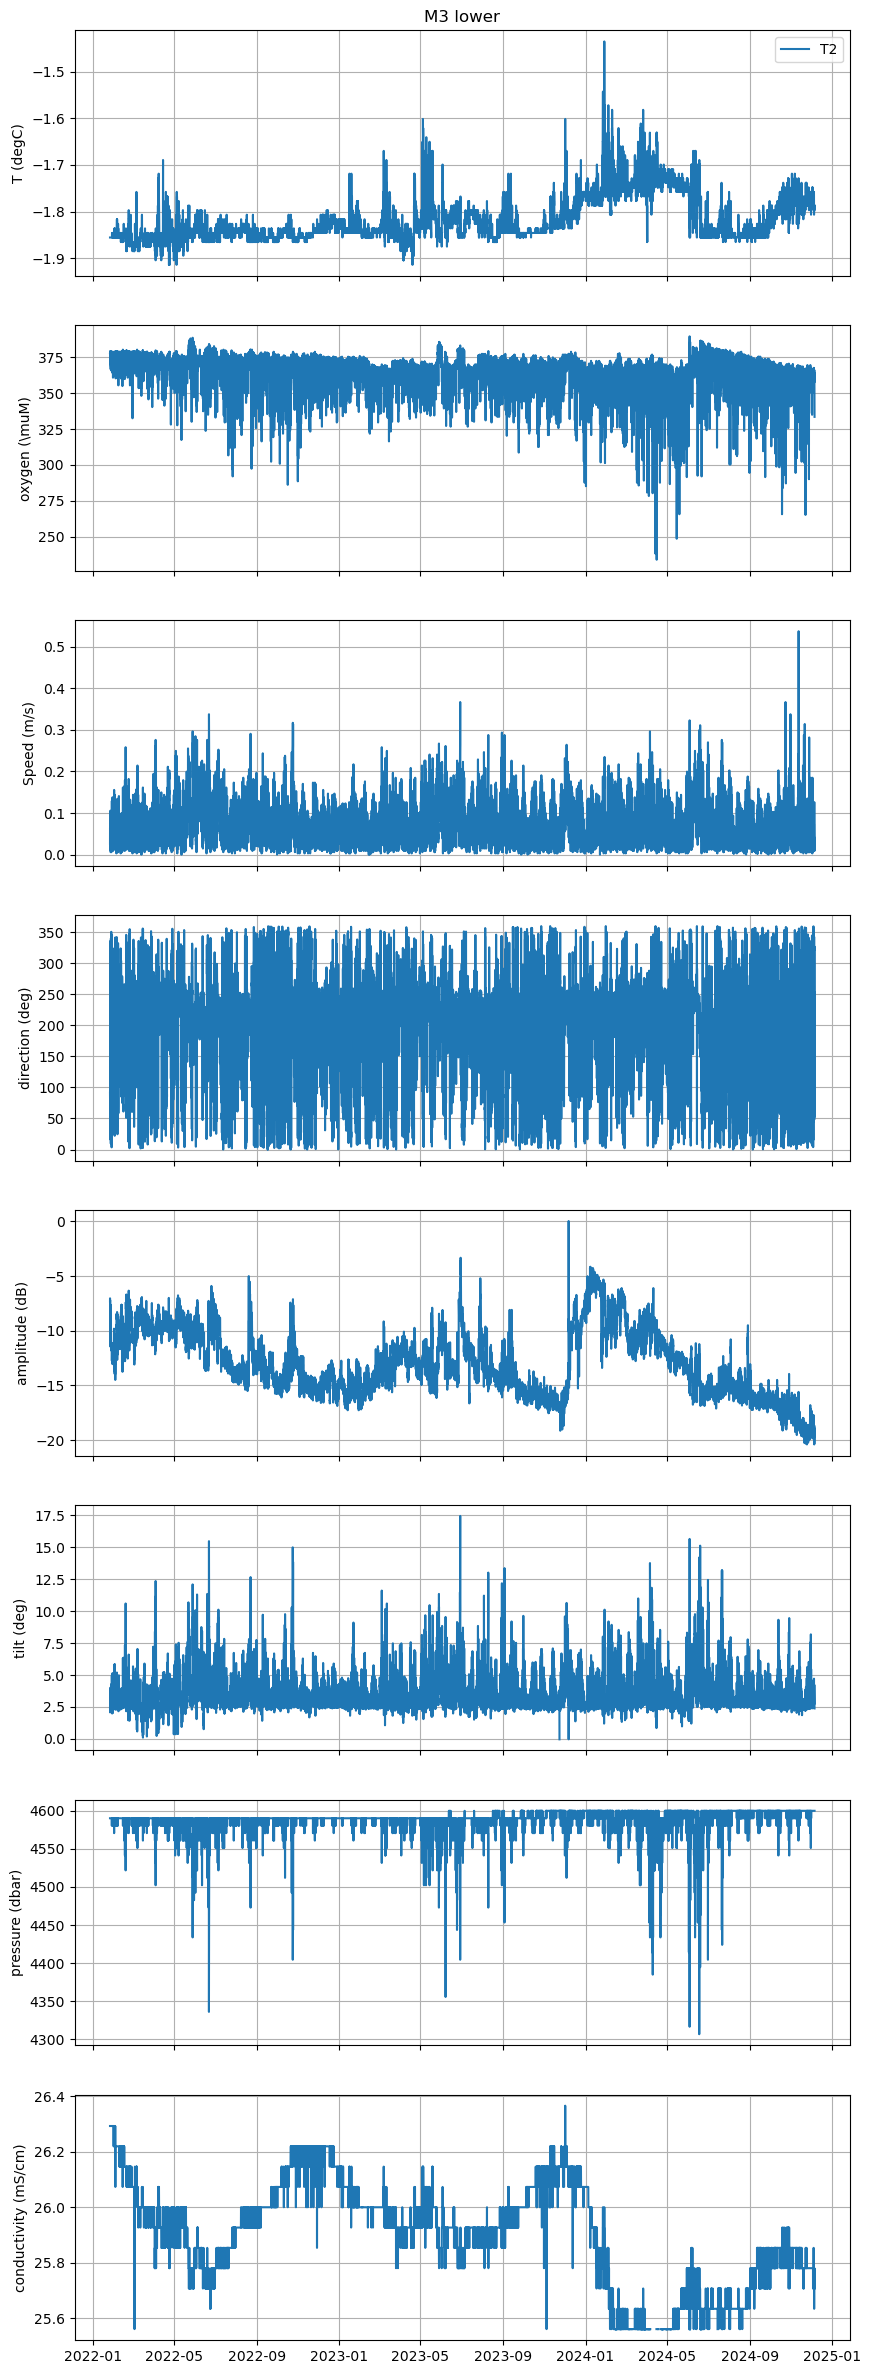

In [ ]:

# convert & plot M3 lower

# Define the number of hours in your time series
num_hours = len(dfl.index)  # Example length of time series

# Create datetime vector
dfl.time = pd.date_range(start=start_date, periods=num_hours, freq="H")

dfl.spd = 0.01*2.933E-01*dfl[1]
#spd[spd > 0.3] = np.nan

dfl.dir = 3.516E-01*dfl[2]
dfl.c = 7.324E-02*dfl[4]
dfl.p = 9.766E+00*dfl[5]
dfl.o2 = 4.883E-01*dfl[7]
dfl.amp = -3.9100E-02*dfl[8]
dfl.tlt = 4.3988E-02*dfl[9]

d = dfl[3]
dfl.t1 = -3.205E+00 + 9.006E-03*d + -3.476E-07*d**2 + 1.134E-10 # Arctic
# dfl.t1[dfl.t1 < -2] = np.nan

d = dfl[6]
dfl.t2 = -5.000E+00 + 9.76563E-03*d
#dfl.t2[dfl.t2 < -2] = np.nan

dfl.loc[dfl.t2 < -2, :] = np.nan
dfl.loc[dfl.t2 < -2, :] = np.nan

# plot M3 lower

fig,ax=plt.subplots(8,1, sharex =True, figsize=np.array([10, 30]))
#pvar[pvar <-2] = np.nan
ax[0].plot(dfl.time, dfl.t2, label="T2")
#ax[0].plot(dfl.time, dfl.t1, label="T1")
ax[0].set_ylabel("T (degC)")
ax[0].set_title("M3 lower")
ax[0].legend()
ax[0].grid()

ax[1].plot(dfl.time, dfl.o2)
ax[1].set_ylabel("oxygen (\muM)")
ax[1].grid()

ax[2].plot(dfl.time, dfl.spd)
ax[2].set_ylabel("Speed (m/s)")
ax[2].grid()

ax[3].plot(dfl.time, dfl.dir)
ax[3].set_ylabel("direction (deg)")
ax[3].grid()

ax[4].plot(dfl.time, dfl.amp)
ax[4].set_ylabel("amplitude (dB)")
ax[4].grid()

ax[5].plot(dfl.time, dfl.tlt)
ax[5].set_ylabel("tilt (deg)")
ax[5].grid()

ax[6].plot(dfl.time, dfl.p)
ax[6].set_ylabel("pressure (dbar)")
ax[6].grid()

pvar = dfl.c
pvar[pvar<25.5]=np.nan
ax[7].plot(dfl.time, pvar)
ax[7].set_ylabel("conductivity (mS/cm)")
ax[7].grid()

plt.savefig("../plot/M3_lower.png",bbox_inches='tight')